In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import  asarray as ar,exp
from  scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit, basinhopping
import math
from pylab import meshgrid, imshow, cm, contour,clabel,colorbar,axis,title,show
import pickle
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

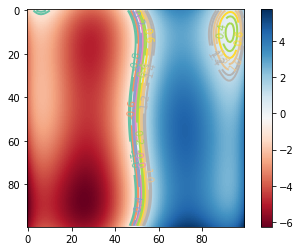

TypeError: 'builtin_function_or_method' object is not subscriptable

In [26]:
#defining the function
def f(x,y):
    return (4-2.1*x**2 + x**4/3)*x*2 + x*y + (4*y**2-4)*y**2

x = np.linspace(-2,2, 100)
y = np.linspace(-1,1,100)

X,Y = meshgrid(x, y) # grid of point
Z = f(X,Y) # evaluation of the function on the grid
im = imshow(Z, cmap=cm.RdBu )
# adding the Contour lines with labels
cset = contour(Z,np.arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
#title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

points = np.array[25,70]

solution = optimize.minimize(f(x,y), points)





2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

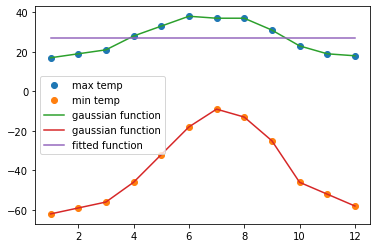

In [78]:
#array with my data
maxim = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
minim = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

#plotting data
plt.figure(figsize=(6,4))
plt.plot(month, maxim, 'o', ms = 6, label ='max temp')
plt.plot(month, minim, 'o', ms = 6, label ='min temp')


#I can interpolate this with a gaussian -> check if it works
mean,std= norm.fit(maxim)
y = norm.pdf(maxim, mean, std)
plt.plot(month, maxim, label = "gaussian function")

mean,std= norm.fit(minim)
y = norm.pdf(minim, mean, std)
plt.plot(month, minim, label = "gaussian function")

n = len(month)
mean_1 = sum(month*maxim)/n  
sigma_1 = sum(maxim*(month - mean)**2)/n

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = optimize.curve_fit(gaus, month, maxim, p0=[1,mean_1, sigma_1], full_output=False)
plt.plot(month, gaus(maxim, popt[0], popt[1], popt[2]), label='fitted function')

plt.legend()



3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it. OK
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin) OK
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

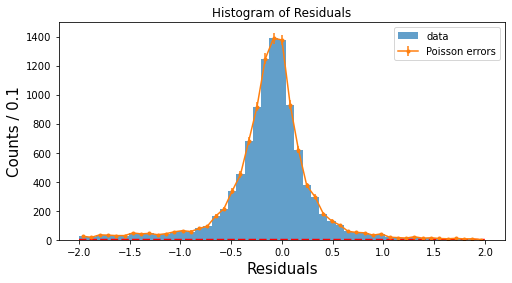

In [84]:
filename = 'residuals_261.pkl'

#opening the pickle file
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()
#converting the pickle in dictionary
dictionary = dict(new_dict.item())
#converting dictionary to dataframe
res = pd.DataFrame(dictionary)


#creating figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

#choosing binning
binx = np.linspace(-2.,2.,50)
histo,n,_ = ax.hist(res['residuals'], bins = binx, range=(-2,2), label = "data", alpha = 0.7)

#creating the array of binning centers 
x = (binx[1:] + binx[:-1])/2
width = binx[1] - binx[0]

#setting label 
ax.set_ylabel(f'Counts / {width:.1f}', size = 15)
ax.set_xlabel('Residuals', size = 15)
ax.set_title("Histogram of Residuals")

#creating a new column of my dataframe 
res['bin'] = np.digitize(res['residuals'], bins = binx)
res['bin'] = res['bin'].astype(float)


#setting Poisson errors
erry = np.sqrt(histo)
ax.errorbar(
    x,
    histo,
    yerr = erry,
    marker = '.',
    label = 'Poisson errors'
)

#fitting with gaussian
def gauss_function(x, a, x0, s):
    return a*np.exp(-(x-x0)**2/(2*s**2))

#finding the best parameters
mu, sigma = norm.fit(res['residuals'])

#performing the fit -> NON FUNZIONA
y = norm.pdf(binx, mu, sigma)
l = plt.plot(binx, y, 'r--', linewidth=2)

ax.legend()


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012. OK

   - What are the best-fit values of the parameters? OK

   - What is the overall average temperature in Munich OK, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

The best fit parameters are for f(x):
 amplitude: -9.988133661428728 
 shift -0.23334760558929407  
 traslation 9.38411486824205

 The best fit parameters are for g(x):
 amplitude: -9.98225024669981 
 pulse 1.0014435065175635 
 shift -31.030506989516436  
 traslation 9.398119591830584

 The overall average temperature in Munich is 9.4 celsius


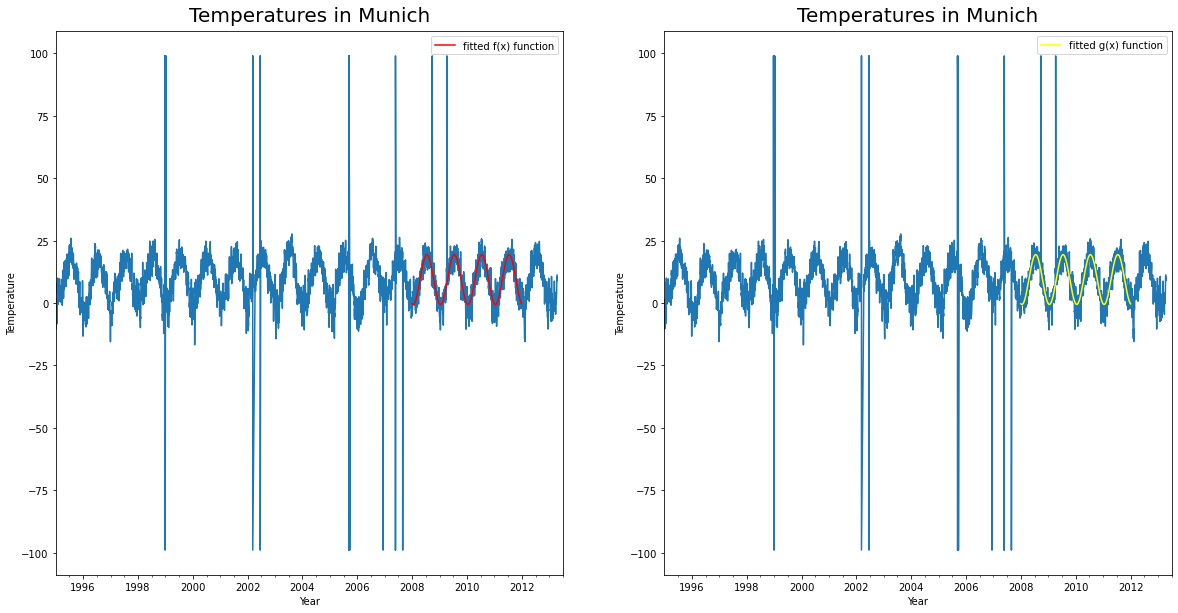

In [40]:
#downloading the file (only once then I can comment this line to avoid downloading the file several times)
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P /

#opening the txt file with data
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", header=None)
data.columns = ["year", "temperature"]
data = data.dropna(how='all')
#!cat munich_temperatures_average_with_bad_data.txt


fig, ax = plt.subplots(nrows=1, ncols=2, sharex="row", figsize=(20,10))

#setting features for the plot
ax[0].set_xlim(1995, 2013.5)
ax[0].xaxis.set_major_locator(MultipleLocator(2))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Temperature")
ax[0].set_title("Temperatures in Munich", fontsize=20, verticalalignment='bottom')
ax[0].plot(data['year'], data['temperature'])

ax[1].set_xlim(1995, 2013.5)
ax[1].xaxis.set_major_locator(MultipleLocator(2))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Temperature")
ax[1].set_title("Temperatures in Munich", fontsize=20, verticalalignment='bottom')
ax[1].plot(data['year'], data['temperature'])

#defining f(x) function
def f(x, a, b,c):
    return a * np.cos(2*math.pi*x + b) + c
#defining g(x) function
def g(x, a, b,c,d):
    return a * np.cos(2*math.pi*x*b + c) + d

#range of the fit
data = data[data['year']>2008]
data = data[data['year']<2012]

#making the fit with f(x) and plotting it
popt1, pcov1 = curve_fit(f, data['year'], data['temperature'], p0=[25,1,1], full_output=False)
ax[0].plot(data['year'], f(data['year'], popt1[0], popt1[1], popt1[2]), label='fitted f(x) function', color = 'red')

ax[0].legend()

#making the fit with g(x) and plotting it
popt2, pcov2 = curve_fit(g, data['year'], data['temperature'], p0=[25,1,1,1], full_output=False)
ax[1].plot(data['year'], g(data['year'], popt2[0], popt2[1], popt2[2], popt2[3]), label='fitted g(x) function', color = 'yellow')
ax[1].legend()


#getting the parameters
print("The best fit parameters are for f(x):\n", "amplitude:", popt1[0],"\n shift" ,popt1[1], " \n traslation",popt1[2])
print("\n The best fit parameters are for g(x):\n", "amplitude:", popt2[0],"\n pulse", popt2[1],"\n shift" ,popt2[2], " \n traslation",popt2[3])
#NON CREDO SIA GIUSTO QUESTO FIT

#getting the average of temperature
average = data['temperature'].mean()
print("\n The overall average temperature in Munich is", round(average,1), "celsius")



